In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.corr()

Estimated Unemployment Rate (%)  \
 Estimated Unemployment Rate (%)                                  1.000000   
 Estimated Employed                                              -0.245176   
 Estimated Labour Participation Rate (%)                         -0.073540   
longitude                                                         0.149976   
latitude                                                         -0.023976   

                                           Estimated Employed  \
 Estimated Unemployment Rate (%)                    -0.245176   
 Estimated Employed                                  1.000000   
 Estimated Labour Participation Rate (%)            -0.047948   
longitude                                           -0.113664   
latitude                                            -0.119321   

                                           Estimated Labour Participation Rate (%)  \
 Estimated Unemployment Rate (%)                                         -0.073540   
 Estimated Employed                                                      -0.047948   
 Estimated Labour Participation Rate (%)                                  1.000000   
longitude                                                                 0.080372   
latitude                                                                  0.397836   

                                          longitude  latitude  
 Estimated Unemployment Rate (%)           0.149976 -0.023976  
 Estimated Employed                       -0.113664 -0.119321  
 Estimated Labour Participation Rate (%)   0.080372  0.397836  
longitude                                  1.000000  0.125895  
latitude                                   0.125895  1.000000

In [6]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})

In [8]:
df.head()

State         Date  Frequency    EUR        EE   ELPR Region  \
0  Andhra Pradesh   31-01-2020          M   5.48  16635535  41.02  South   
1  Andhra Pradesh   29-02-2020          M   5.83  16545652  40.90  South   
2  Andhra Pradesh   31-03-2020          M   5.79  15881197  39.18  South   
3  Andhra Pradesh   30-04-2020          M  20.51  11336911  33.10  South   
4  Andhra Pradesh   31-05-2020          M  17.43  12988845  36.46  South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [9]:
df["State"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [10]:
df["State"].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64

In [11]:
df["Region"].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [12]:
df["Region"].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region, dtype: int64

In [13]:
region_stats = df.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

Region    EUR           EE   ELPR
0       East  13.92  19602366.90  40.11
1      North  15.89  13072487.92  38.70
2  Northeast  10.95   3617105.53  52.06
3      South  10.45  14040589.33  40.44
4       West   8.24  18623512.72  41.26

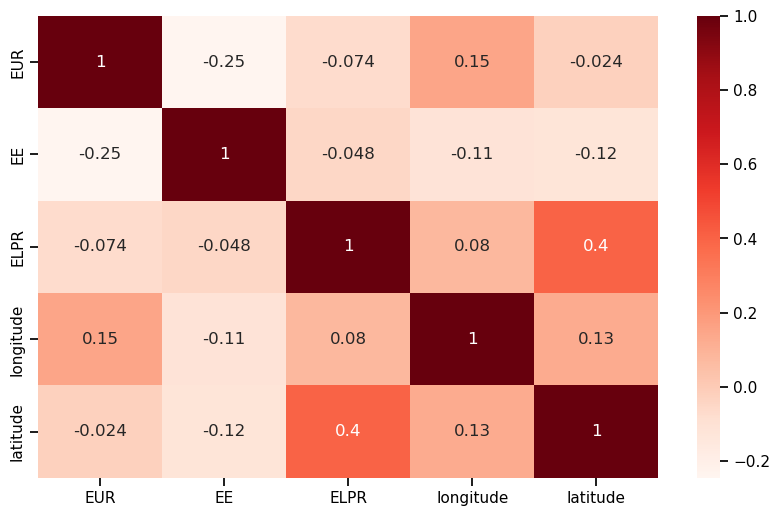

In [14]:
heat_maps = df[['EUR','EE', 'ELPR','longitude', 'latitude']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='Reds');

## Unemployment rate according to different regions of India 

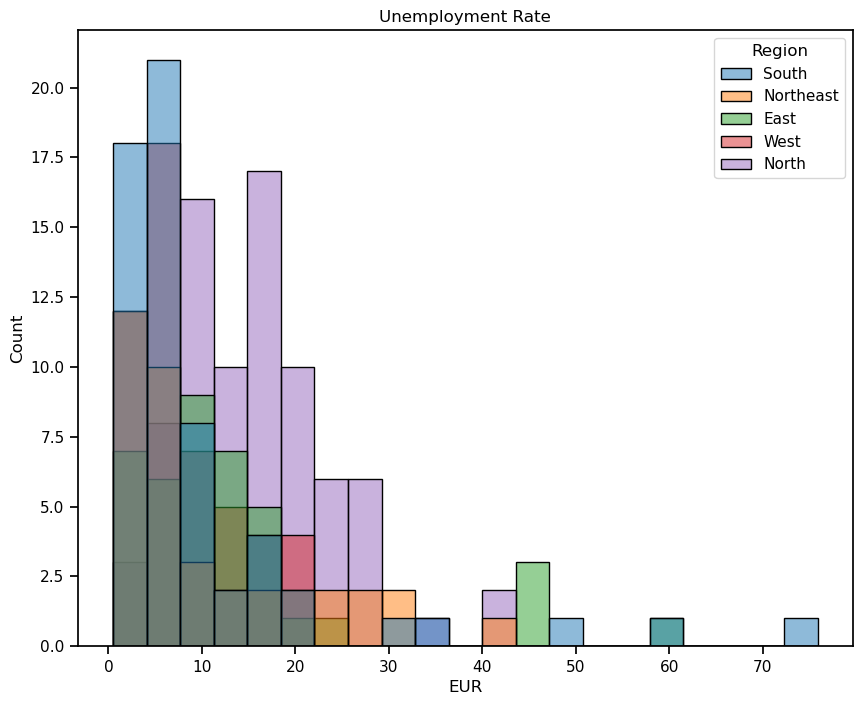

In [15]:
df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region","longitude","latitude"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [16]:
import plotly.express as px
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [17]:
unemployment = df[["State", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()